In [7]:
from sklearn.linear_model import LinearRegression
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import datetime as dt
import pandas as pd
import numpy as np
import os

%matplotlib inline
mpl.rcParams["axes.labelsize"] = 12
mpl.rcParams["axes.titlesize"] = 12
mpl.rcParams["xtick.labelsize"] = 12
mpl.rcParams["ytick.labelsize"] = 12
mpl.rcParams["lines.linewidth"] = 2
mpl.rcParams["legend.fontsize"] = 8
mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["image.cmap"] = "viridis"

ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
ALL_DIR = os.path.join(ROOT_DIR, "data", "All.csv")


In [8]:
def violin(cmap,metric,sources,date_start,date_end,window):
    from mycolorpy import colorlist as mcp

    def set_axis_style(ax, labels):
        ax.get_yaxis().set_tick_params(direction='out')
        ax.xaxis.set_ticks_position('bottom')
        ax.set_yticks(np.arange(1, len(labels) + 1))
        ax.set_yticklabels(labels)
        ax.set_ylim(0.25, len(labels) + 0.75)

    novelties,resonances = [],[]
    avg_novelties, avg_resonances,names = [],[],[]
    
    for name in sources:
        if name == "All":
            continue
        names.append(name)
        i = pd.read_csv(os.path.join(ROOT_DIR, f"results_{window}", name + "_Results.csv"))
        i['Date'] = pd.to_datetime(i['Date'])
        df_split = i.loc[(i['Date'] >= date_start) & (i['Date'] < date_end)]
        novelty = df_split["Novelty"].to_list()
        novelties.append(novelty)
        resonance = df_split["Resonance"].to_list()
        resonances.append(resonance)
        avg_novelties.append(sum(novelty)/len(novelty))
        avg_resonances.append(sum(resonance)/len(resonance))

    avg_novelty = sum(avg_novelties)/len(avg_novelties)
    avg_resonance = sum(avg_resonances)/len(avg_resonances)

    df = pd.DataFrame(list(zip(names, novelties, resonances, avg_novelties, avg_resonances)), columns =['Name', 'Novelty','Resonance','Avg_Novelty','Avg_Resonance'])
    df_sorted = df.sort_values(by="Avg_"+str(metric))

    fs = 10  # fontsize
    data = novelties

    fig, ax = plt.subplots(figsize=(6, 10))

    plot = ax.violinplot(df_sorted[metric], points=200, vert=False, widths=0.8,
                        showmeans=True, showextrema=True, showmedians=False,
                        bw_method=0.5)

    if metric == "Novelty":
        title = "Novelties - Violin - Mean and Extrema"
    else:
        title = "Resonances - Violin - Mean and Extrema"
    ax.set_title(title)

    set_axis_style(ax, df_sorted["Name"])

    colors=mcp.gen_color(cmap,n=12)
    for i, pc in enumerate(plot["bodies"], 1):
            pc.set_linewidth(0.1)
            pc.set_edgecolor('black')
            pc.set_alpha(0.6)
            pc.set_facecolor(colors[i-1])

    w=1
    plot["cmeans"].set_color('#303030')
    plot["cmins"].set_color('#3d3d3d')
    plot["cmaxes"].set_color('#3d3d3d')
    plot["cbars"].set_color('#3d3d3d')
    plot["cmeans"].set_linewidth(1.3)
    plot["cmins"].set_linewidth(w)
    plot["cmaxes"].set_linewidth(w)
    plot["cbars"].set_linewidth(w)
    
    
    plt.show()

    return fig


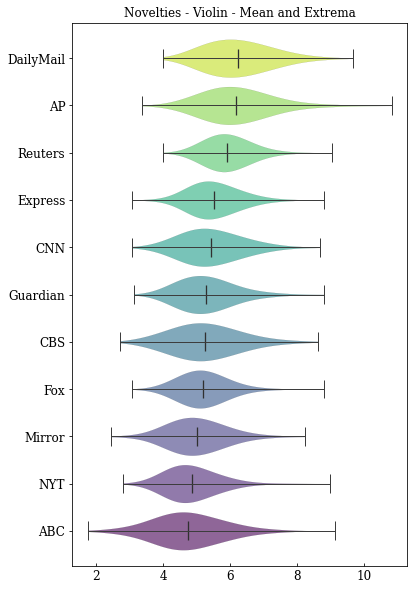

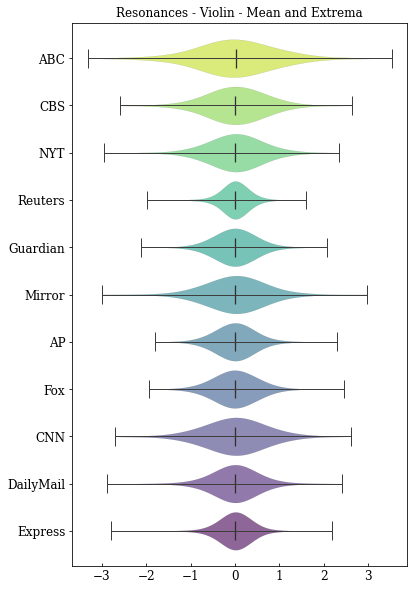

In [9]:
sources = ["AP", "Fox", "CNN", "ABC", "CBS", "NYT", "Mirror", "Reuters", "Express", "Guardian", "DailyMail", "All"]
date_start,date_end = "03-01-2022","12-01-2022"
windows=[5]

for window in windows:
    fig1 = violin("viridis","Novelty",sources,date_start,date_end,window)
    fig1.savefig(os.path.join(ROOT_DIR, "figures", "violin", f"Novelties_Violin_{window}.svg"), format="svg", dpi=1000, bbox_inches="tight")

    fig2 = violin("viridis","Resonance",sources,date_start,date_end,window)
    fig2.savefig(os.path.join(ROOT_DIR, "figures","violin", f"Resonances_Violin_{window}.svg"), format="svg", dpi=1000, bbox_inches="tight")